In [535]:
pip install xgboost

In [536]:
pip install catboost

In [537]:
pip install --upgrade xgboost

Requirement already up-to-date: xgboost in /usr/local/lib/python3.7/dist-packages (1.4.2)


In [538]:
import numpy as np
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from lightgbm import LGBMClassifier
import pandas as pd
from catboost import CatBoostClassifier, Pool

#Datasets

In [539]:
#Se cargan los datasets de entrenamiento y de test
train_data = pd.read_csv('train.csv', delimiter=",")
test_data = pd.read_csv('test.csv', delimiter=",")

#Se hace un pequeño preprocesamiento de los datos
X = train_data
Y = train_data['target'].str.replace("Class_", ' ') #Eliminar 'Class_' de la variable target para quedarse con el valor numerico
Y = Y.astype(int)
Y = Y-1
del X['target'] #aqui borrar features 3 4 8 17 21

#Split del dataset de training
seed = 12321
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#XGBoost

In [540]:
#Se convierte el dataset de entrenamiento a una matriz con la que puede trabajar XGBoost
train_matrix = xgb.DMatrix(x_train, label=y_train)
test_matrix = xgb.DMatrix(x_test, label=y_test)
evallist = [(test_matrix, 'eval'), (train_matrix, 'train')]
#parametros del modelo
xgb_params = {
    'max_depth': 2, #profundidad del arbol
    'eta': 0.4,     #learning rate
    'booster':'gbtree',
    'alpha':1,      #regularizacion L1
    'gamma': 0.2,
    'min_child_weight': 2.38,   
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': 4 
    }

XGBModel = xgb.train(xgb_params, train_matrix, 200,evals=evallist)


[0]	eval-mlogloss:1.24880	train-mlogloss:1.24647
[1]	eval-mlogloss:1.18519	train-mlogloss:1.18109
[2]	eval-mlogloss:1.15305	train-mlogloss:1.14769
[3]	eval-mlogloss:1.13596	train-mlogloss:1.12974
[4]	eval-mlogloss:1.12667	train-mlogloss:1.11980
[5]	eval-mlogloss:1.12160	train-mlogloss:1.11413
[6]	eval-mlogloss:1.11851	train-mlogloss:1.11055
[7]	eval-mlogloss:1.11668	train-mlogloss:1.10824
[8]	eval-mlogloss:1.11555	train-mlogloss:1.10661
[9]	eval-mlogloss:1.11457	train-mlogloss:1.10535
[10]	eval-mlogloss:1.11395	train-mlogloss:1.10428
[11]	eval-mlogloss:1.11334	train-mlogloss:1.10341
[12]	eval-mlogloss:1.11271	train-mlogloss:1.10261
[13]	eval-mlogloss:1.11227	train-mlogloss:1.10191
[14]	eval-mlogloss:1.11169	train-mlogloss:1.10126
[15]	eval-mlogloss:1.11119	train-mlogloss:1.10053
[16]	eval-mlogloss:1.11068	train-mlogloss:1.09992
[17]	eval-mlogloss:1.11042	train-mlogloss:1.09936
[18]	eval-mlogloss:1.11007	train-mlogloss:1.09878
[19]	eval-mlogloss:1.10969	train-mlogloss:1.09821
[20]	eval-

In [605]:
#Se convierte el dataset de entrenamiento a una matriz con la que puede trabajar XGBoost
eval_set = [(x_train, y_train), (x_test, y_test)]


model = XGBClassifier(objective='multi:softprob', 
                      use_label_encoder=False, 
                      num_class=4, 
                      colsample_bytree=0.5, 
                      subsample=0.9,
                      learning_rate=0.2,
                      max_depth = 2,
                      min_child_weight=1,
                      alpha=1,
                      reg_lambda =12,
                      n_estimators = 350
                      )

model.fit(x_train, y_train, eval_metric=["mlogloss", "merror"], eval_set=eval_set)


[0]	validation_0-mlogloss:1.31034	validation_0-merror:0.42401	validation_1-mlogloss:1.31169	validation_1-merror:0.42905
[1]	validation_0-mlogloss:1.25743	validation_0-merror:0.42402	validation_1-mlogloss:1.25963	validation_1-merror:0.42905
[2]	validation_0-mlogloss:1.21911	validation_0-merror:0.42402	validation_1-mlogloss:1.22216	validation_1-merror:0.42905
[3]	validation_0-mlogloss:1.19114	validation_0-merror:0.42402	validation_1-mlogloss:1.19469	validation_1-merror:0.42905
[4]	validation_0-mlogloss:1.17034	validation_0-merror:0.42402	validation_1-mlogloss:1.17458	validation_1-merror:0.42905
[5]	validation_0-mlogloss:1.15488	validation_0-merror:0.42402	validation_1-mlogloss:1.15975	validation_1-merror:0.42905
[6]	validation_0-mlogloss:1.14344	validation_0-merror:0.42402	validation_1-mlogloss:1.14886	validation_1-merror:0.42905
[7]	validation_0-mlogloss:1.13474	validation_0-merror:0.42402	validation_1-mlogloss:1.14052	validation_1-merror:0.42905
[8]	validation_0-mlogloss:1.12821	valida

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=2, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=12, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

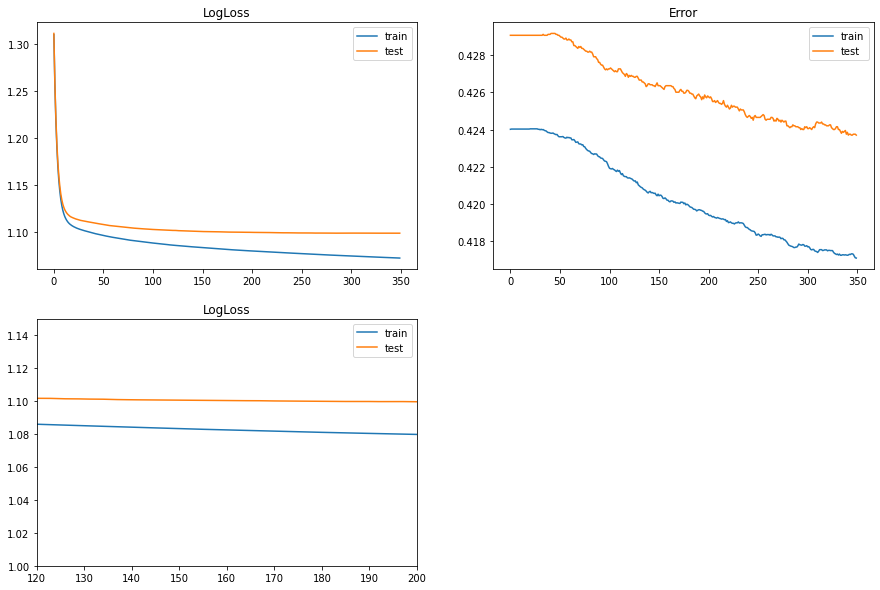

In [606]:
import matplotlib.pyplot as plt

results = model.evals_result()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0,0].plot(results['validation_0']['mlogloss'], label='train')
axes[0,0].plot(results['validation_1']['mlogloss'], label='test')
axes[0,0].set_title('LogLoss')
axes[0,0].legend()


axes[0,1].plot(results['validation_0']['merror'], label='train')
axes[0,1].plot(results['validation_1']['merror'], label='test')
axes[0,1].set_title('Error')
axes[0,1].legend()



axes[1,0].plot(results['validation_0']['mlogloss'], label='train')
axes[1,0].plot(results['validation_1']['mlogloss'], label='test')
axes[1,0].axis([120, 200, 1, 1.15])
axes[1,0].set_title('LogLoss')
axes[1,0].legend()

axes[1,1].set_visible(False)

#LGB Model

In [608]:
#Se convierten los datasets a un dataset de lgb
d_train=lgb.Dataset(x_train, label=y_train)

lgb_params={'learning_rate':0.2,
        'num_iterations':300,
        'boosting_type':'gbdt',
        'objective':'multiclass',
        'metric':'multi_logloss',
        'max_depth':4,
        'num_class':4
        }

LGBModel=lgb.train(lgb_params, d_train,200)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


#CatBoost

In [544]:
#Se convierten los datasets a un formato con el que CatBoost puede trabajar
train_pool = Pool(data=x_train, label=y_train)
test_pool = Pool(data=x_test, label=y_test.values) 

In [643]:
CBModel = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg = 5,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    verbose=True
)
CBModel.fit(train_pool,eval_set=test_pool)


0:	learn: 1.3570088	test: 1.3574151	best: 1.3574151 (0)	total: 68.2ms	remaining: 54.5s
1:	learn: 1.3314777	test: 1.3322578	best: 1.3322578 (1)	total: 122ms	remaining: 48.6s
2:	learn: 1.3091709	test: 1.3103008	best: 1.3103008 (2)	total: 182ms	remaining: 48.5s
3:	learn: 1.2895340	test: 1.2909873	best: 1.2909873 (3)	total: 239ms	remaining: 47.6s
4:	learn: 1.2719762	test: 1.2736979	best: 1.2736979 (4)	total: 298ms	remaining: 47.5s
5:	learn: 1.2564289	test: 1.2584160	best: 1.2584160 (5)	total: 360ms	remaining: 47.7s
6:	learn: 1.2426770	test: 1.2449329	best: 1.2449329 (6)	total: 414ms	remaining: 46.9s
7:	learn: 1.2304153	test: 1.2329107	best: 1.2329107 (7)	total: 472ms	remaining: 46.7s
8:	learn: 1.2194147	test: 1.2221365	best: 1.2221365 (8)	total: 529ms	remaining: 46.5s
9:	learn: 1.2095016	test: 1.2124562	best: 1.2124562 (9)	total: 587ms	remaining: 46.3s
10:	learn: 1.2005928	test: 1.2037736	best: 1.2037736 (10)	total: 645ms	remaining: 46.3s
11:	learn: 1.1925962	test: 1.1959764	best: 1.195976

#Predicciones

Test Partition


In [644]:
#Predicciones con particion de pueba y log_loss
y_xgbpred = model.predict_proba(x_test)
y_lgbpred=LGBModel.predict(x_test)
y_Catpred = CBModel.predict_proba(x_test)
print('log_loss xgboost:  ', log_loss(np.array(y_test), y_xgbpred))
print('log_loss LGBM: ', log_loss(np.array(y_test), y_lgbpred))
print('log_loss CatBoost: ', log_loss(np.array(y_test), y_Catpred))

log_loss xgboost:   1.0987138920351862
log_loss LGBM:  1.107636406454664
log_loss CatBoost:  1.0992880353026142


Test Dataset

In [639]:
#Predicciones con dataset de pureba
test_matrix = xgb.DMatrix(test_data)
y_xgbpred = model.predict_proba(test_data)

y_lgbpred=LGBModel.predict(test_data)

y_Catpred = CBModel.predict_proba(test_data)

#Model Combination

In [641]:
#Se combinan los modelos al realizar un promedio de sus predicciones
preds_combined = (y_lgbpred + y_xgbpred + y_Catpred)/3
preds_combined = np.clip(preds_combined,0.05, 0.95)
combined_data = pd.DataFrame(preds_combined,columns=['Class_1','Class_2','Class_3','Class_4'])
combined_data['id'] = test_data['id']
combined_data = combined_data[['id','Class_1','Class_2','Class_3','Class_4']]
combined_data

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.074179,0.504216,0.315389,0.106216
1,100001,0.075805,0.631403,0.166495,0.126297
2,100002,0.096208,0.615279,0.202480,0.086033
3,100003,0.074982,0.612571,0.185068,0.127379
4,100004,0.075672,0.622324,0.156329,0.145676
...,...,...,...,...,...
19995,119995,0.104964,0.611415,0.191600,0.092021
19996,119996,0.077531,0.563536,0.251873,0.107060
19997,119997,0.083894,0.597906,0.166009,0.152191
19998,119998,0.080817,0.643866,0.204524,0.070793


#Log Loss

In [642]:
from sklearn.metrics import log_loss
log_loss(np.array(y_test), preds_combined)

1.0994429566901072

#Export to CSV

In [616]:
submission = pd.DataFrame(preds_combined, columns=['Class_1','Class_2','Class_3','Class_4'])
submission['id'] = test_data['id']
combined_data.to_csv("submission.csv", index = False)